<a href="https://colab.research.google.com/github/SakshiGailwar/Code-B---Data-Science-Integrated-Internship/blob/main/Phishing_task(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/dataset_phishing.csv")
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [3]:

df.columns


Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [4]:
df["status"].value_counts()

,count
status,
legitimate,5715
phishing,5715


In [5]:

#so we can observe from data there are 89 columns in data with 88 features and 1 target variable
#the target column is the column labeled "status". This column indicates whether a particular website is legitimate or phishing.
#1) "legitimate": This means the website is a trusted, real website.
#2) "phishing": This means the website is a fake website designed to deceive users and steal sensitive information, such as login credentials or credit card details.
#This is Binary Classification problem as the target column "status" has categorical values: "legitimate" and "phishing". These are two distinct categories, and the task is to classify websites into one of these two categories.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [7]:
# prompt: df.isna()

df.isna().sum()


,0
url,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
...,...
web_traffic,0
dns_record,0
google_index,0
page_rank,0


In [8]:
#by observation we can clearly see there are no null or missing values

### **Descriptive Statistics Report**

In [9]:
## Statistical Summary for Numerical features
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [10]:
#Handling Outliers

In [11]:

num=df.describe().columns
num

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['url', 'status'], dtype='object')

In [13]:
# frequency dist
df["url"].value_counts()

,count
url,
http://e710z0ear.du.r.appspot.com/c:/users/user/downlo,2
http://www.crestonwood.com/router.php,1
https://www.riverbed.com/products/steelcentral/network-performance-management/steelcentral-packet-analyzer.html,1
http://fience.vot.pl/xl,1
https://usbank.app.link/NquAmzCW01?platform=hootsuite,1
...,...
http://www.thenine9.com/wp-admin/identifyuser.php?f4a55601b3bca855460a77ee7dd19e76,1
http://cns-international2.com/ssss.htm,1
https://www.century21.jp/,1


In [14]:
df["status"].value_counts()

,count
status,
legitimate,5715
phishing,5715


# **Visual Analysis Report**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

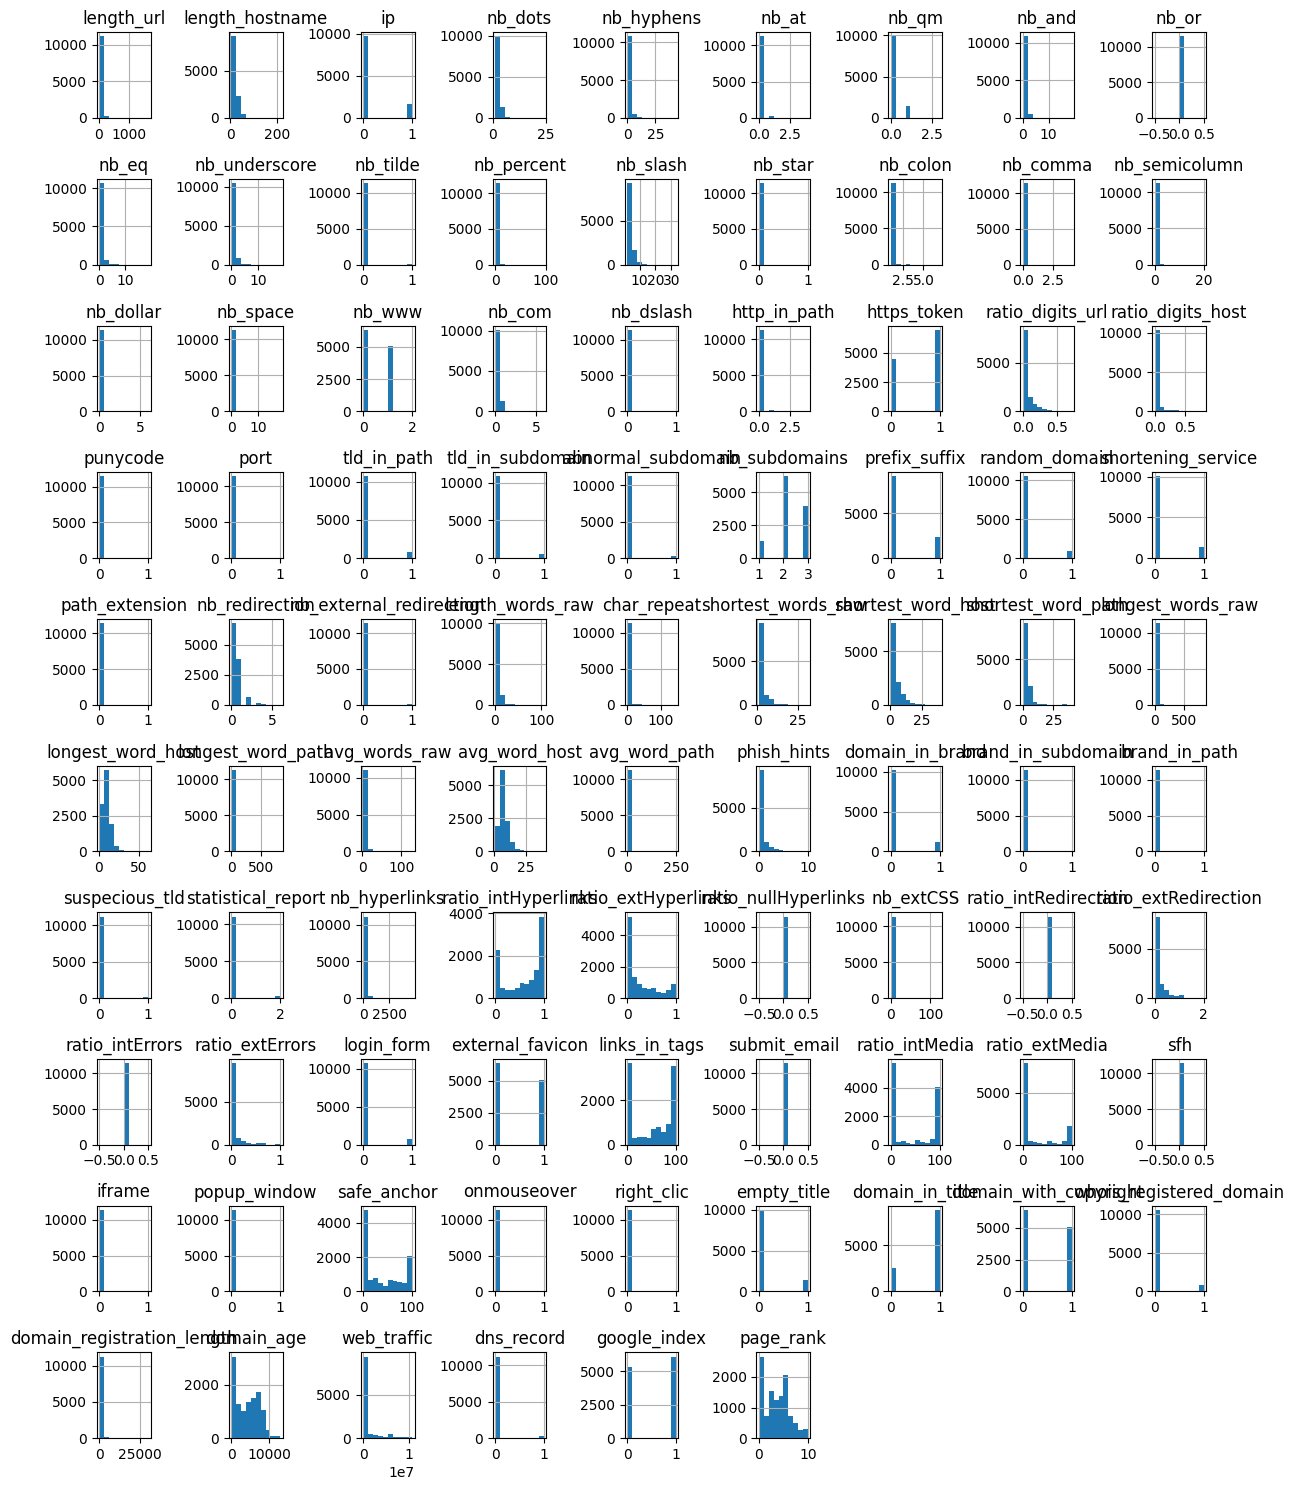

In [16]:
#Histogram: Visual representation of the distribution of numerical features to identify patterns or skewness.
df.hist(figsize=(12, 15))
plt.tight_layout()
plt.show()

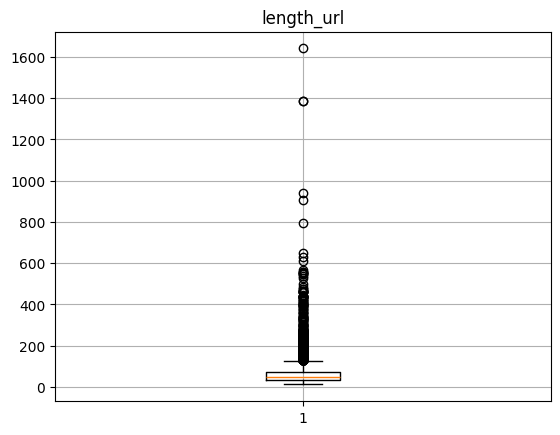

Q1 33.0
Q3 71.0
IQR 38.0
UB 128.0
LB -24.0
******************************************************************************************************************************************************


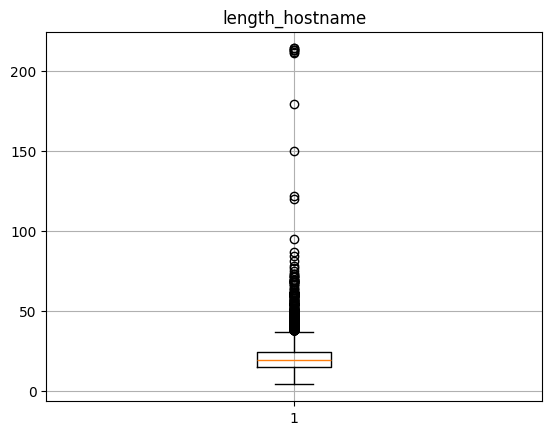

Q1 15.0
Q3 24.0
IQR 9.0
UB 37.5
LB 1.5
******************************************************************************************************************************************************


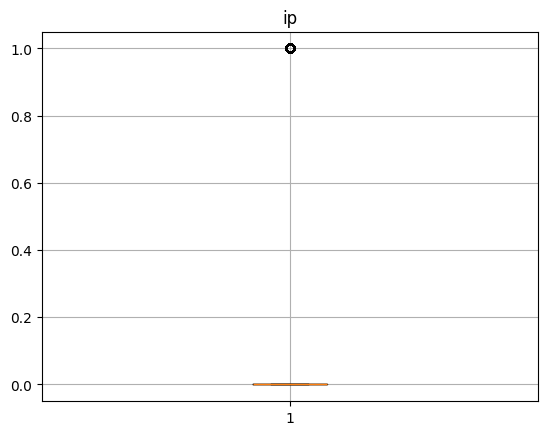

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


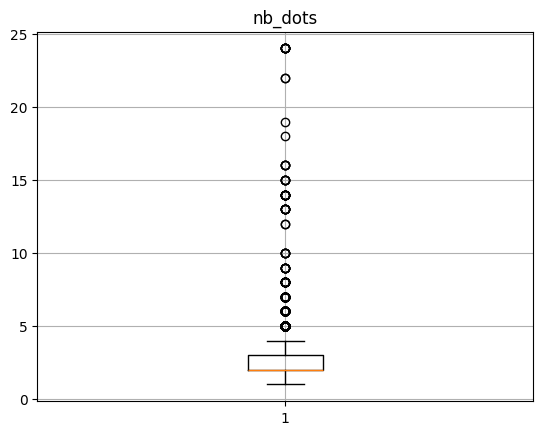

Q1 2.0
Q3 3.0
IQR 1.0
UB 4.5
LB 0.5
******************************************************************************************************************************************************


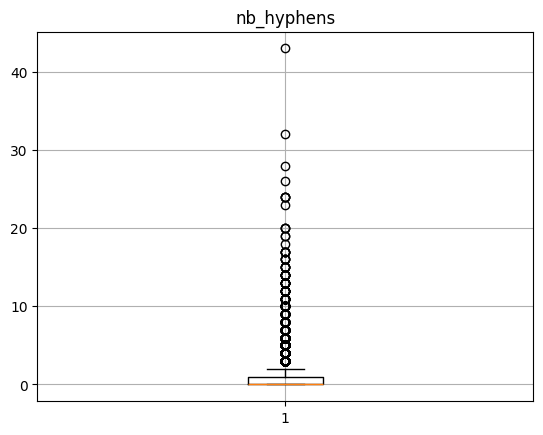

Q1 0.0
Q3 1.0
IQR 1.0
UB 2.5
LB -1.5
******************************************************************************************************************************************************


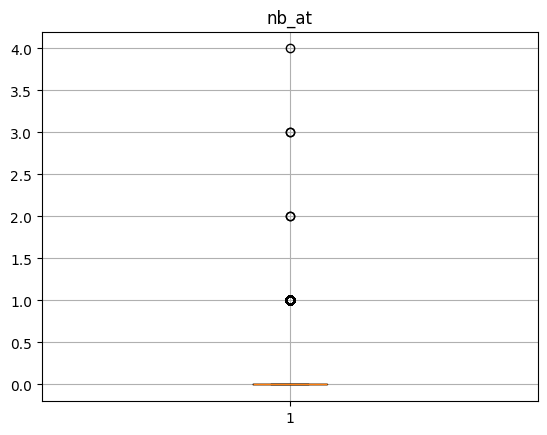

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


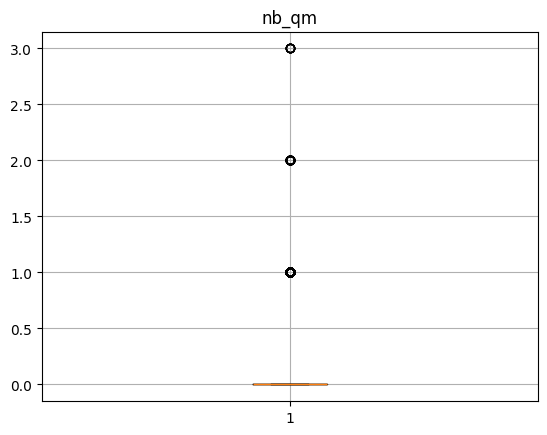

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


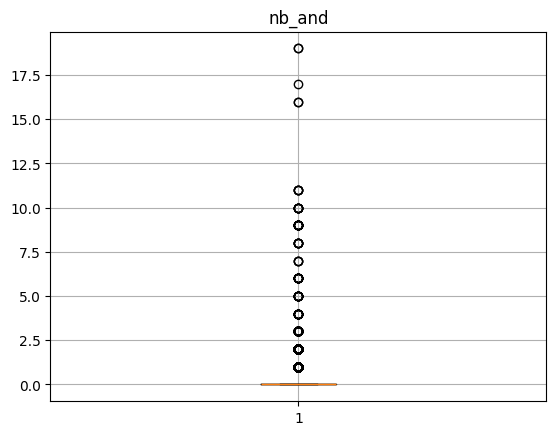

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


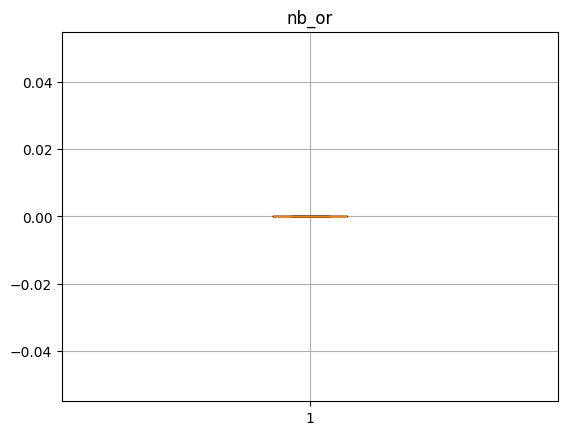

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


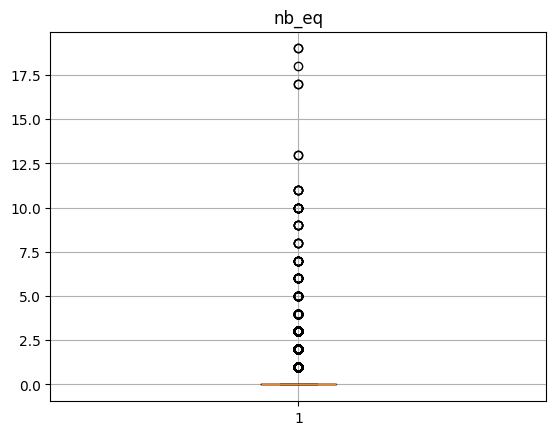

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


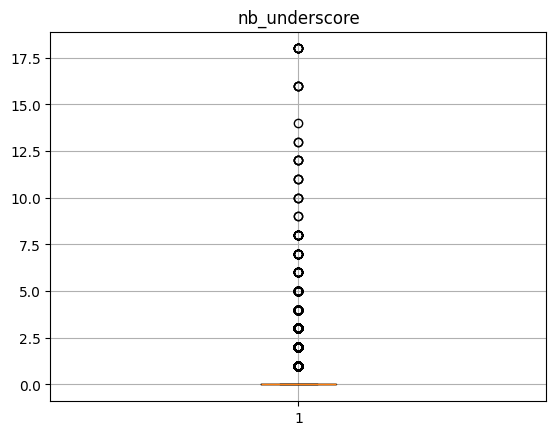

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


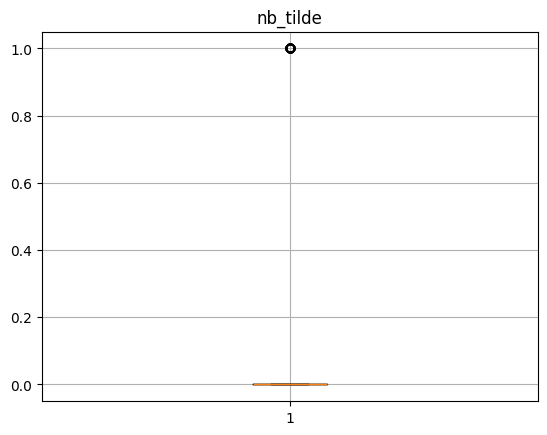

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


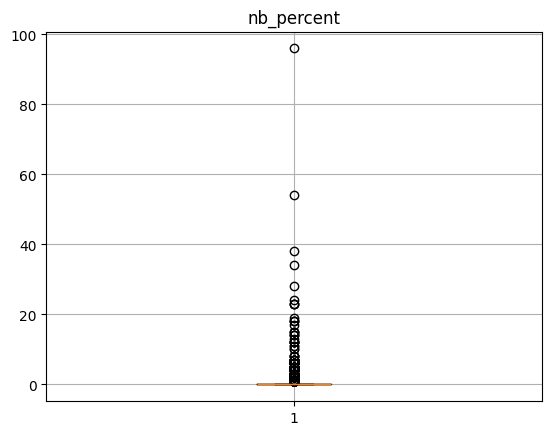

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


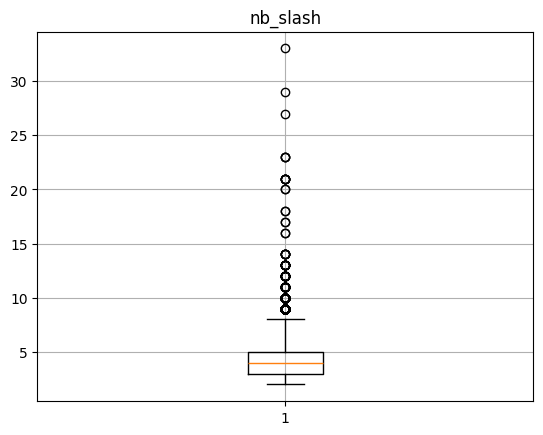

Q1 3.0
Q3 5.0
IQR 2.0
UB 8.0
LB 0.0
******************************************************************************************************************************************************


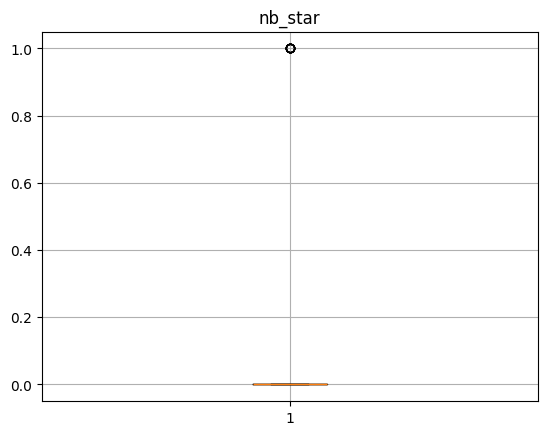

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


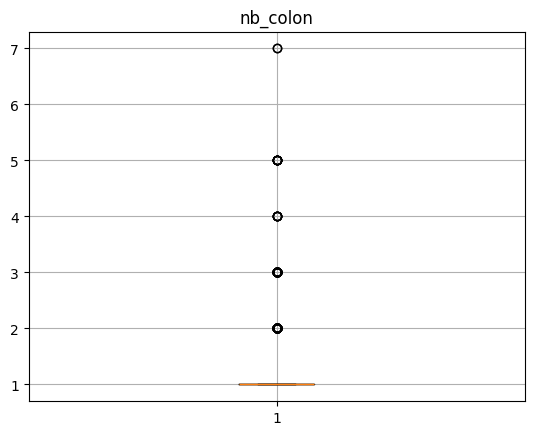

Q1 1.0
Q3 1.0
IQR 0.0
UB 1.0
LB 1.0
******************************************************************************************************************************************************


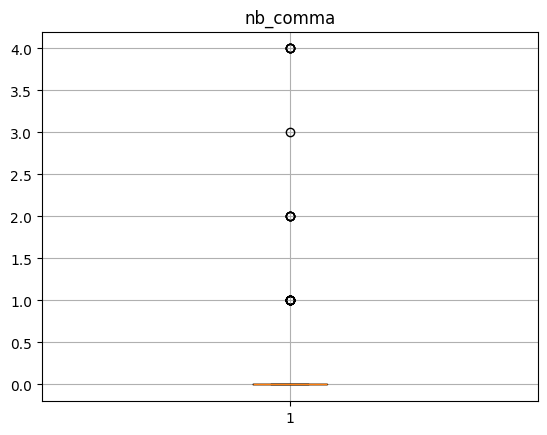

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


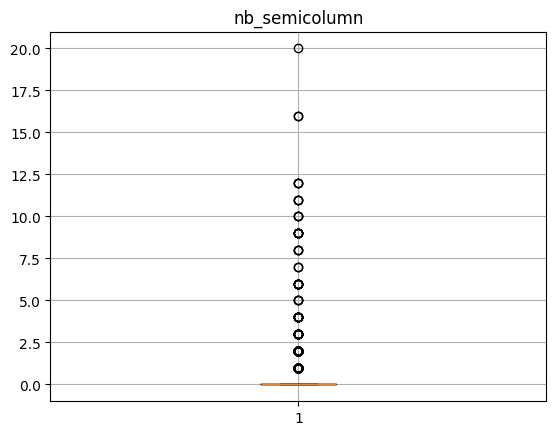

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


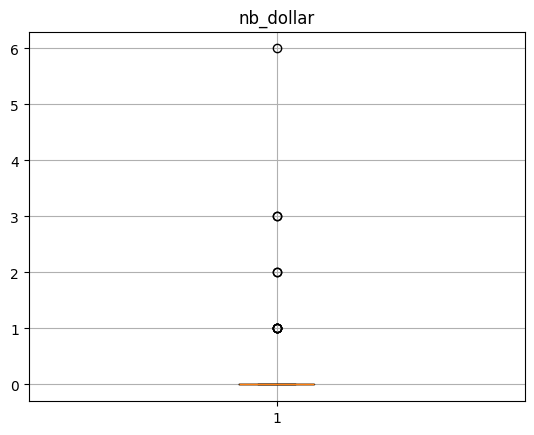

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


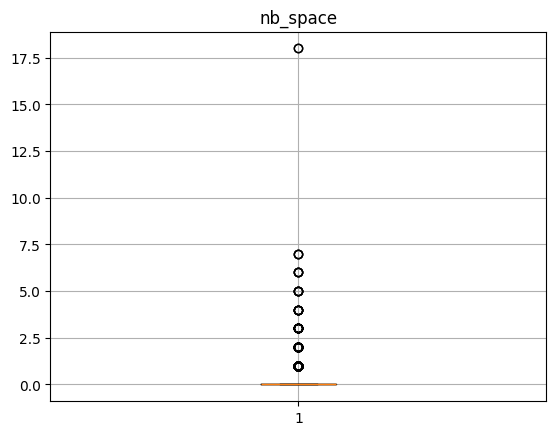

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


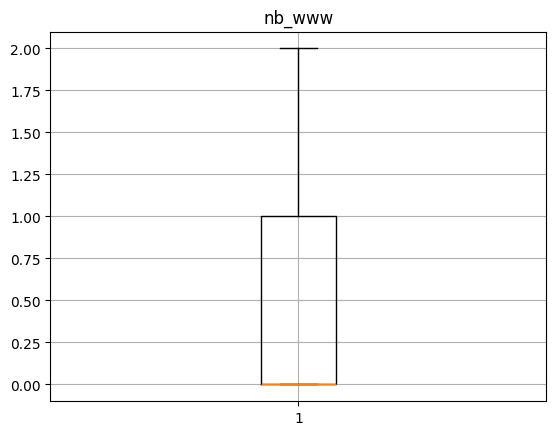

Q1 0.0
Q3 1.0
IQR 1.0
UB 2.5
LB -1.5
******************************************************************************************************************************************************


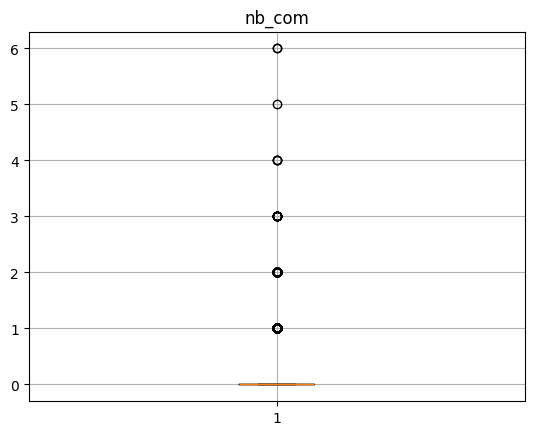

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


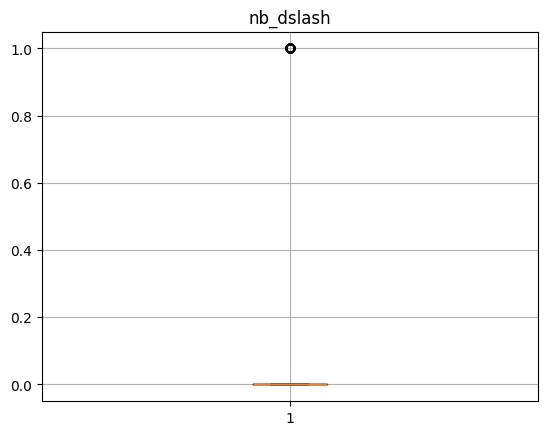

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


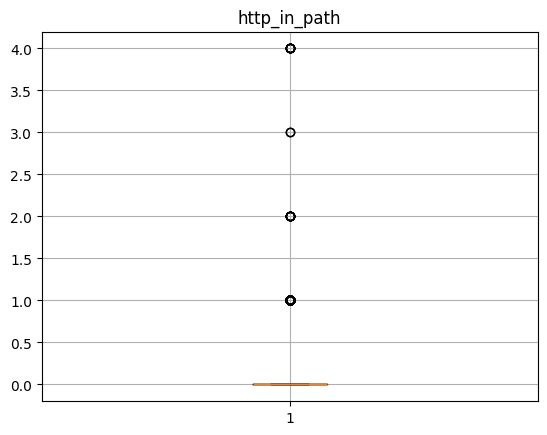

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


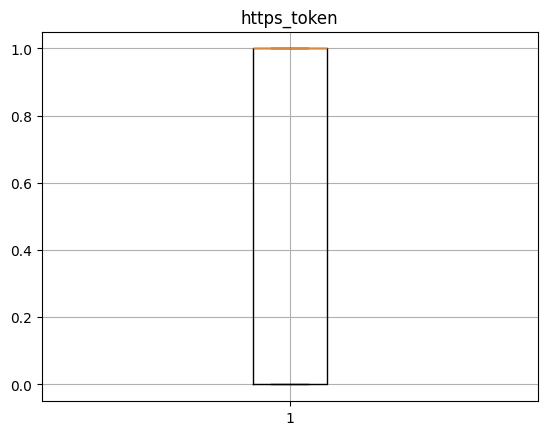

Q1 0.0
Q3 1.0
IQR 1.0
UB 2.5
LB -1.5
******************************************************************************************************************************************************


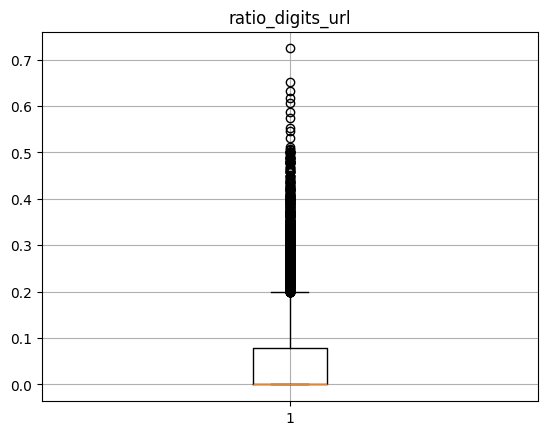

Q1 0.0
Q3 0.079365079
IQR 0.079365079
UB 0.1984126975
LB -0.11904761850000001
******************************************************************************************************************************************************


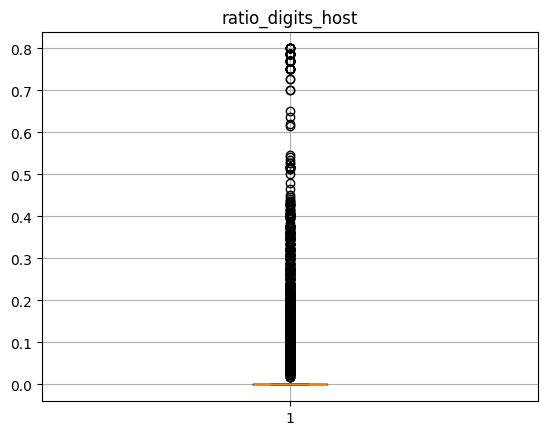

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


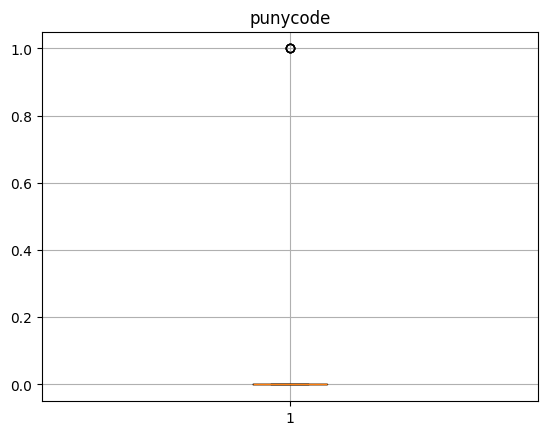

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


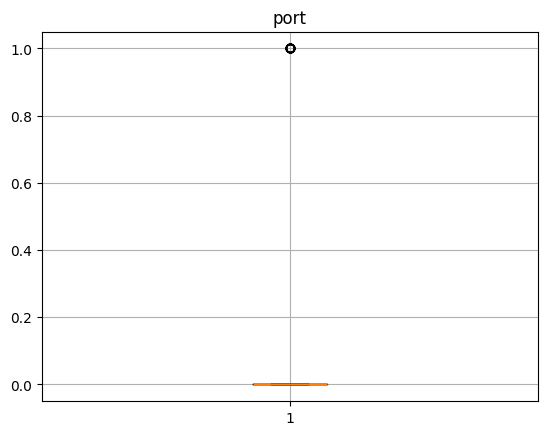

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


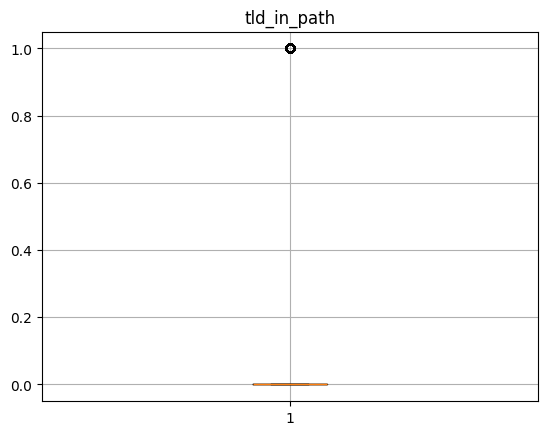

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


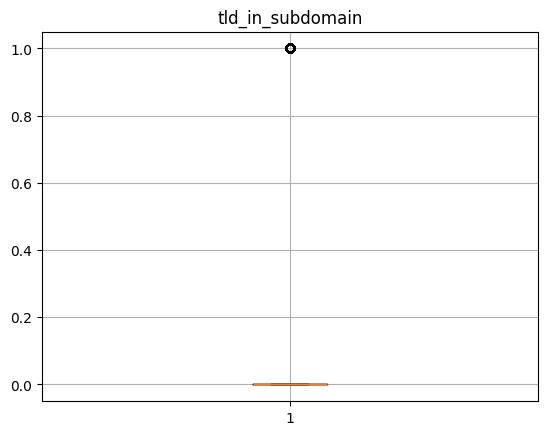

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


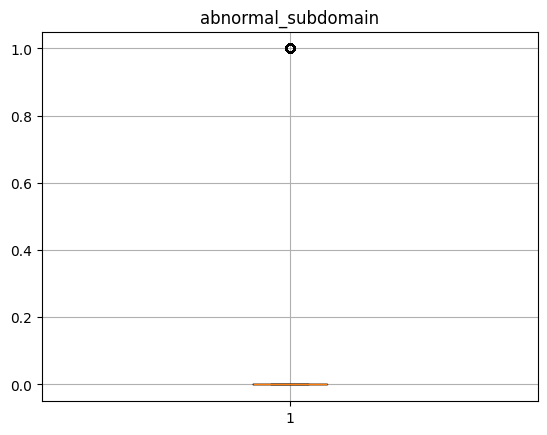

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


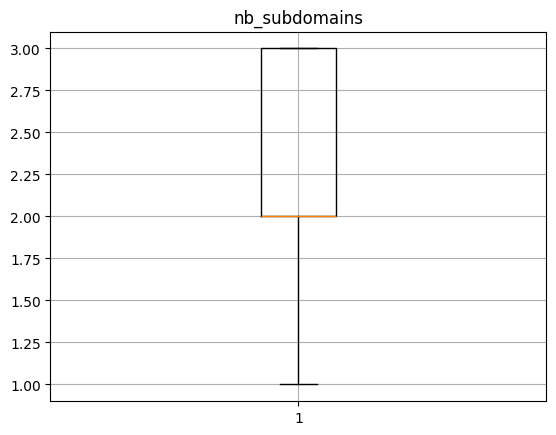

Q1 2.0
Q3 3.0
IQR 1.0
UB 4.5
LB 0.5
******************************************************************************************************************************************************


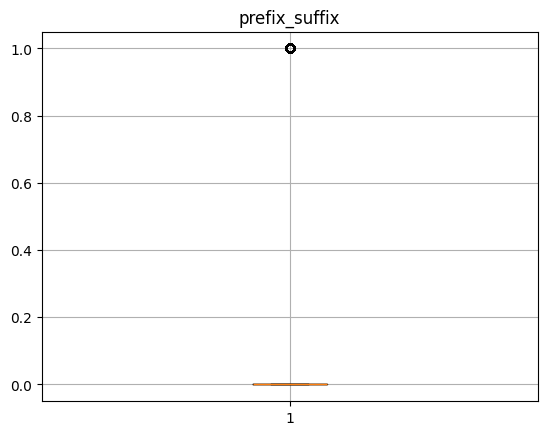

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


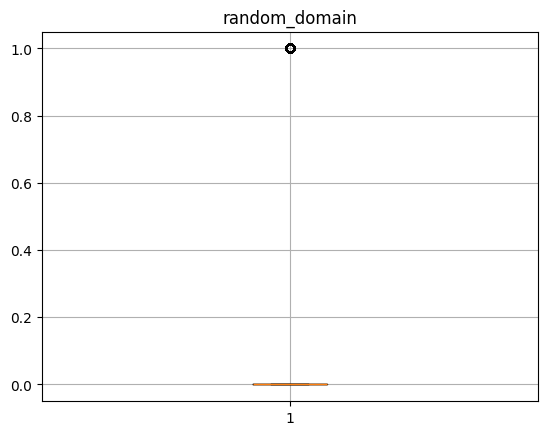

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


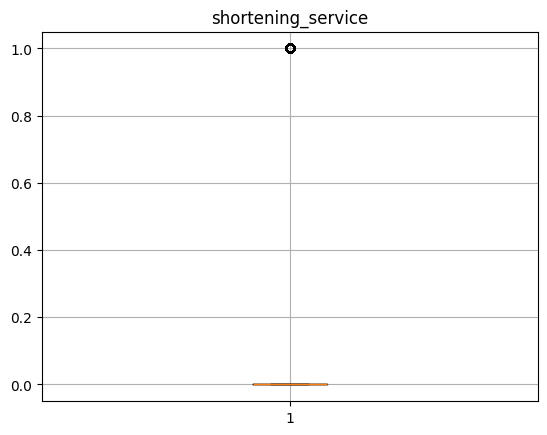

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


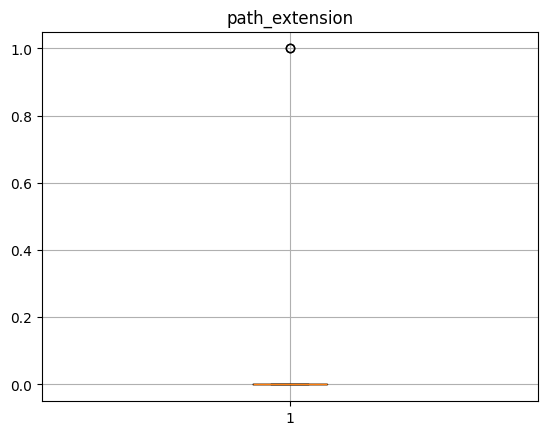

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


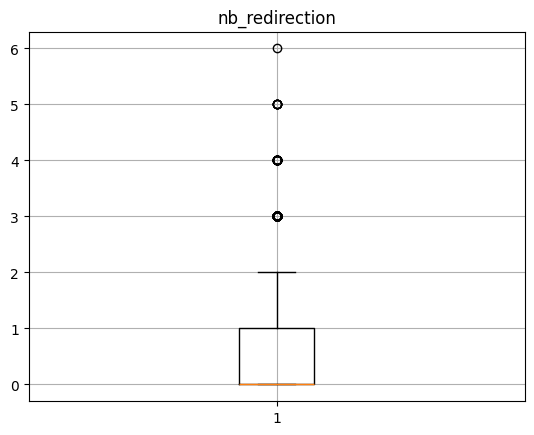

Q1 0.0
Q3 1.0
IQR 1.0
UB 2.5
LB -1.5
******************************************************************************************************************************************************


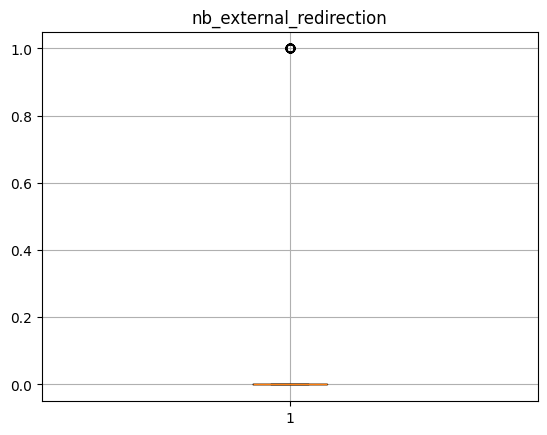

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


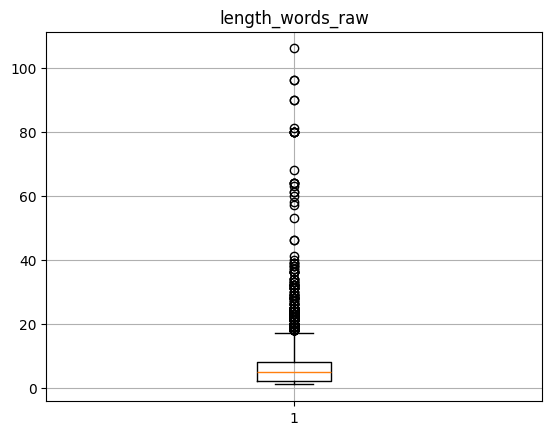

Q1 2.0
Q3 8.0
IQR 6.0
UB 17.0
LB -7.0
******************************************************************************************************************************************************


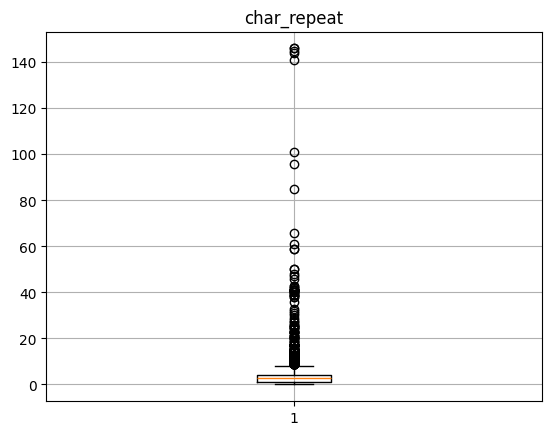

Q1 1.0
Q3 4.0
IQR 3.0
UB 8.5
LB -3.5
******************************************************************************************************************************************************


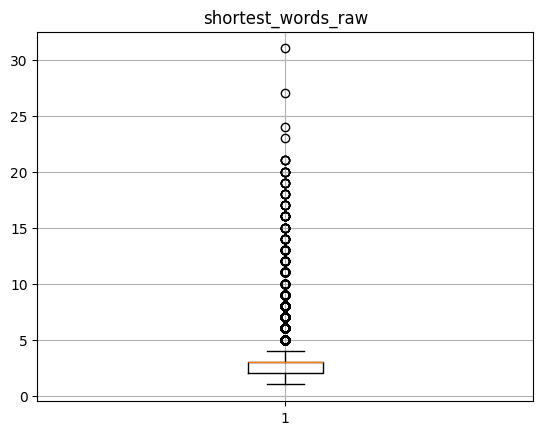

Q1 2.0
Q3 3.0
IQR 1.0
UB 4.5
LB 0.5
******************************************************************************************************************************************************


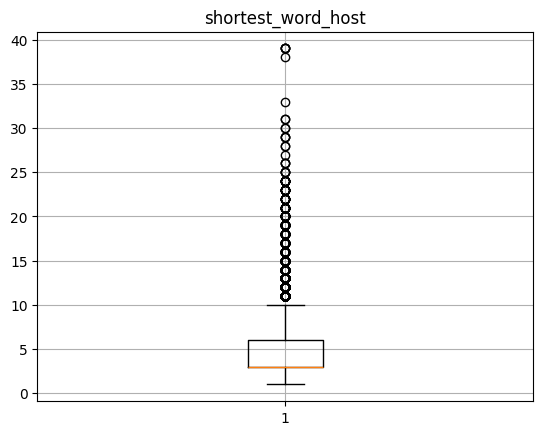

Q1 3.0
Q3 6.0
IQR 3.0
UB 10.5
LB -1.5
******************************************************************************************************************************************************


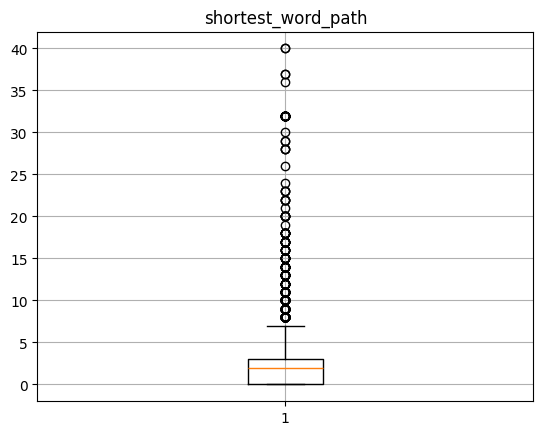

Q1 0.0
Q3 3.0
IQR 3.0
UB 7.5
LB -4.5
******************************************************************************************************************************************************


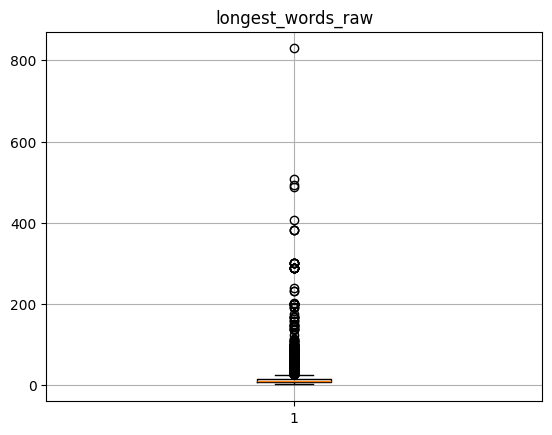

Q1 9.0
Q3 16.0
IQR 7.0
UB 26.5
LB -1.5
******************************************************************************************************************************************************


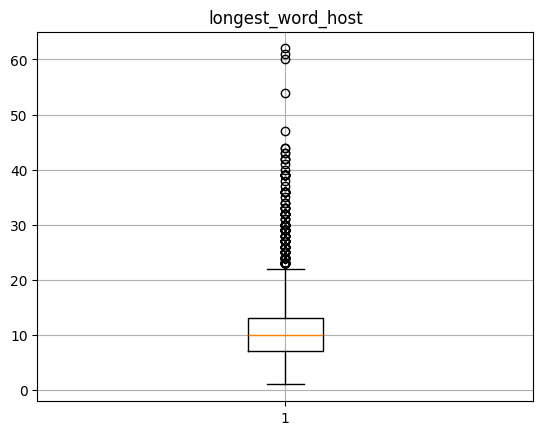

Q1 7.0
Q3 13.0
IQR 6.0
UB 22.0
LB -2.0
******************************************************************************************************************************************************


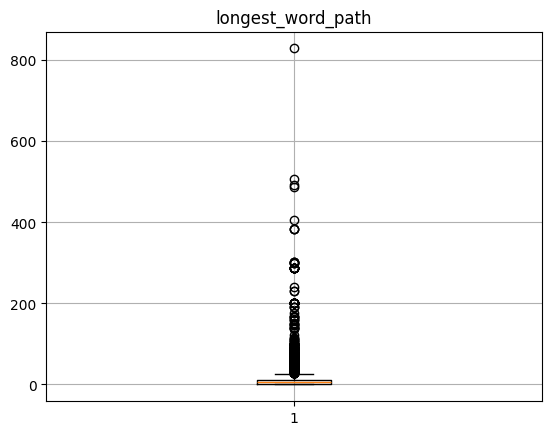

Q1 0.0
Q3 11.0
IQR 11.0
UB 27.5
LB -16.5
******************************************************************************************************************************************************


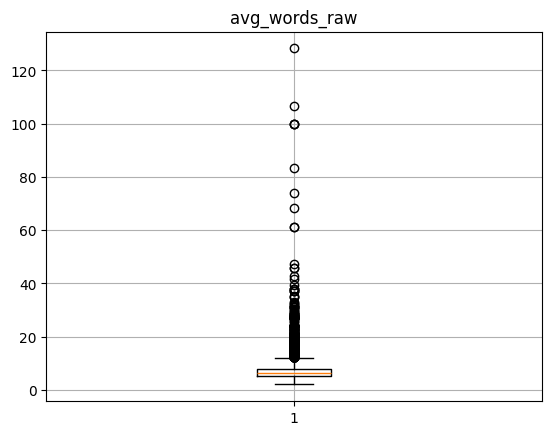

Q1 5.25
Q3 8.0
IQR 2.75
UB 12.125
LB 1.125
******************************************************************************************************************************************************


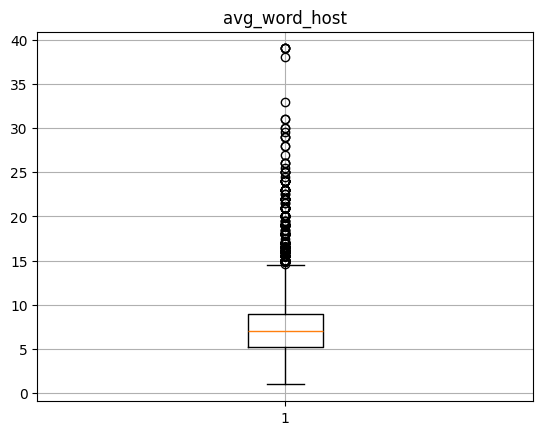

Q1 5.25
Q3 9.0
IQR 3.75
UB 14.625
LB -0.375
******************************************************************************************************************************************************


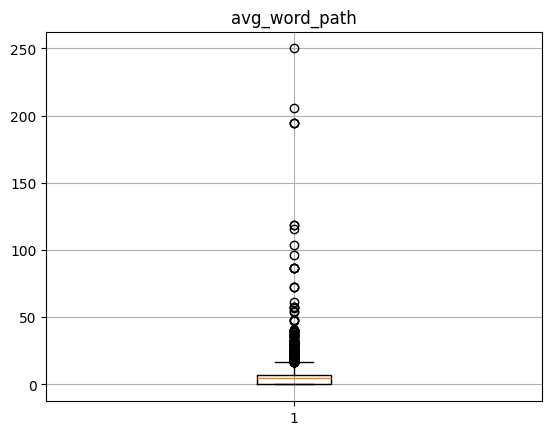

Q1 0.0
Q3 6.714285714
IQR 6.714285714
UB 16.785714285
LB -10.071428571
******************************************************************************************************************************************************


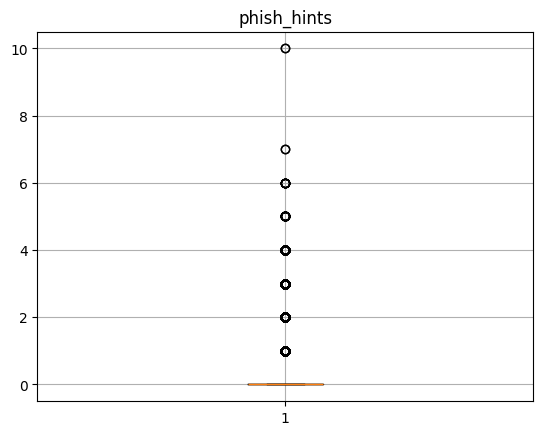

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


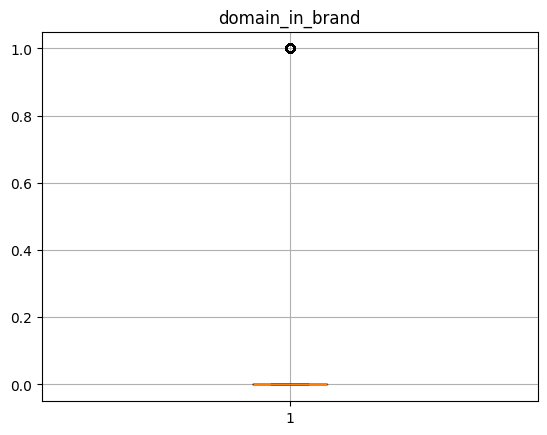

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


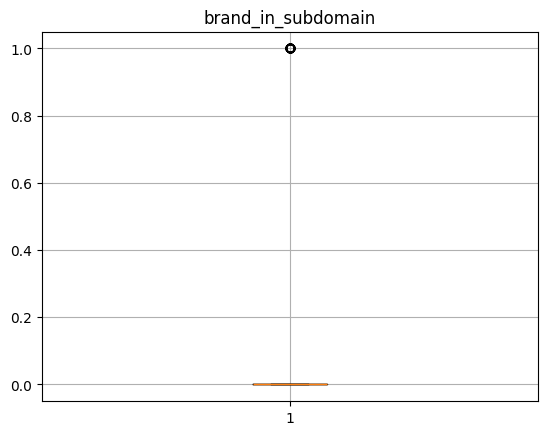

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


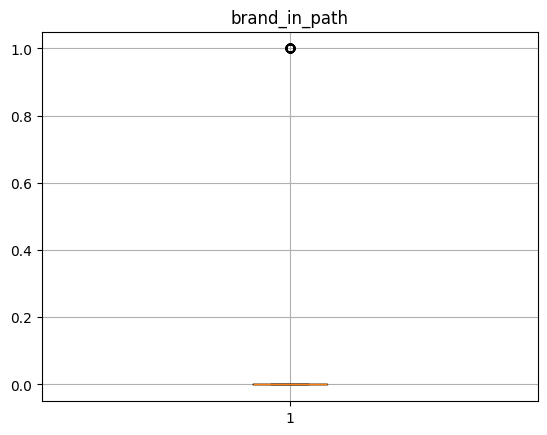

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


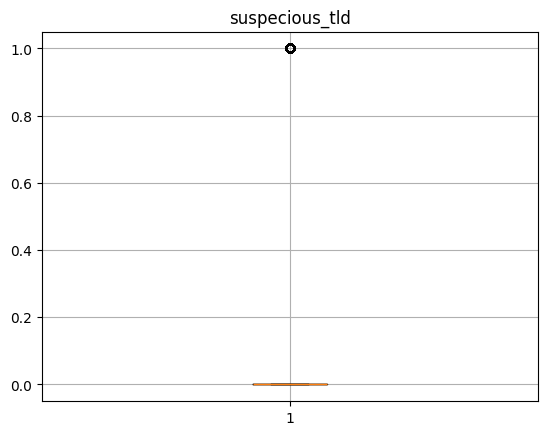

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


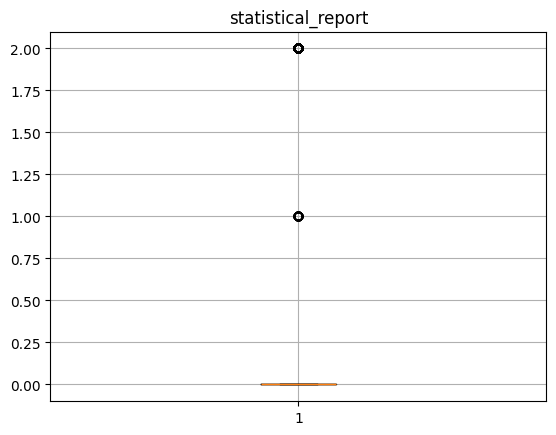

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


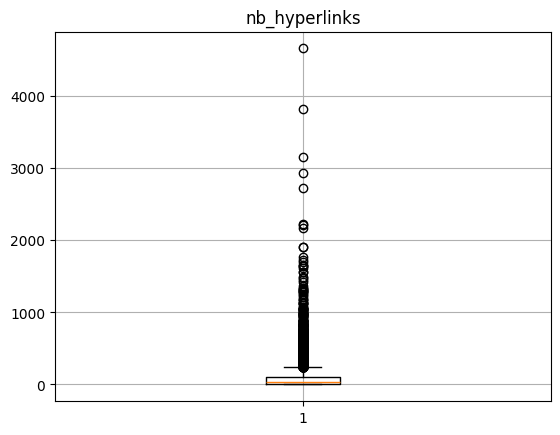

Q1 9.0
Q3 101.0
IQR 92.0
UB 239.0
LB -129.0
******************************************************************************************************************************************************


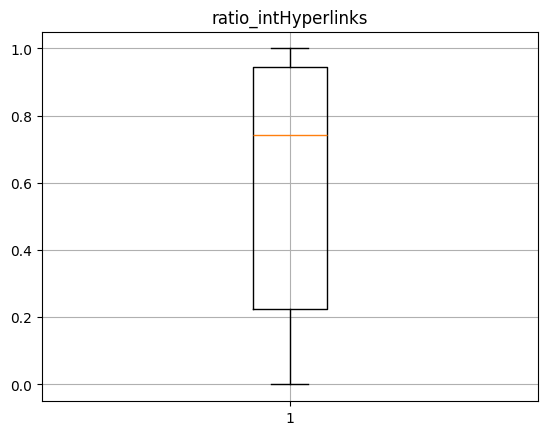

Q1 0.22499093875
Q3 0.9447668414999999
IQR 0.7197759027499999
UB 2.024430695625
LB -0.8546729153749999
******************************************************************************************************************************************************


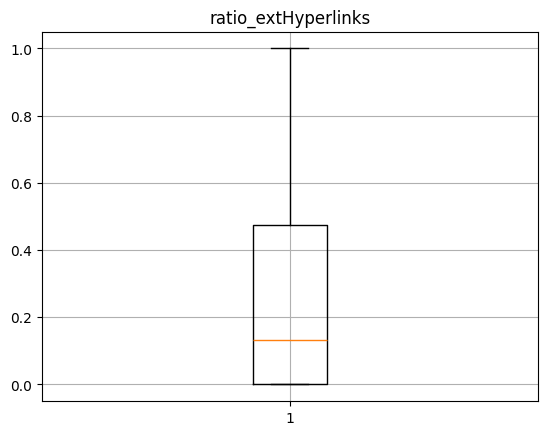

Q1 0.0
Q3 0.47483974349999997
IQR 0.47483974349999997
UB 1.1870993587499998
LB -0.7122596152499999
******************************************************************************************************************************************************


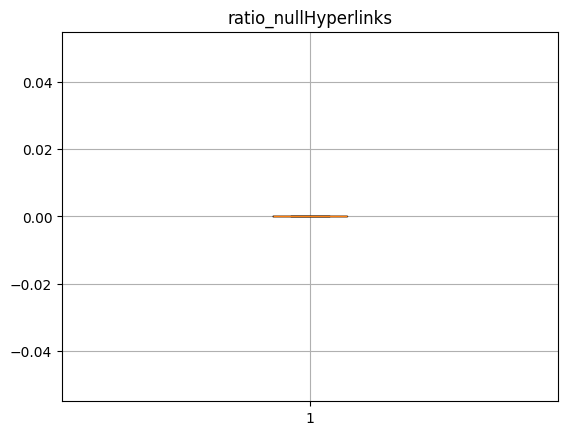

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


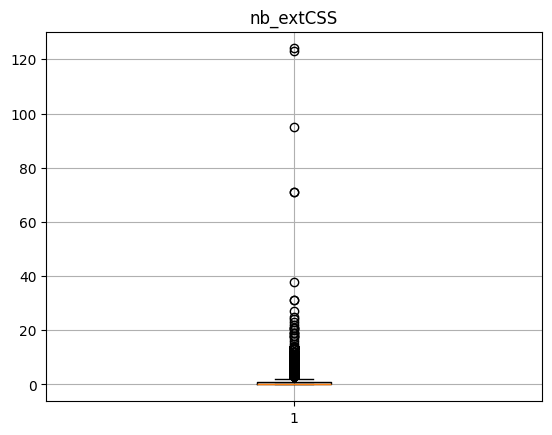

Q1 0.0
Q3 1.0
IQR 1.0
UB 2.5
LB -1.5
******************************************************************************************************************************************************


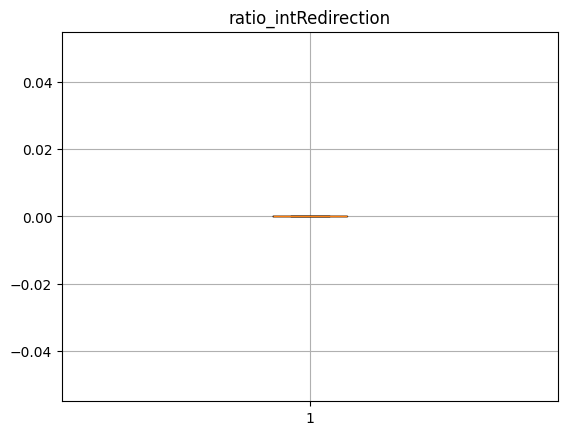

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


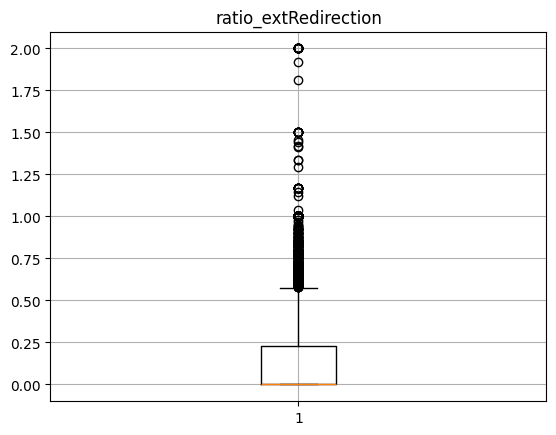

Q1 0.0
Q3 0.230769231
IQR 0.230769231
UB 0.5769230774999999
LB -0.3461538465
******************************************************************************************************************************************************


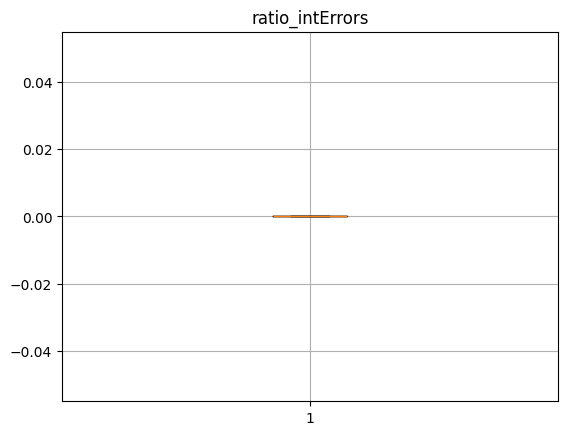

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


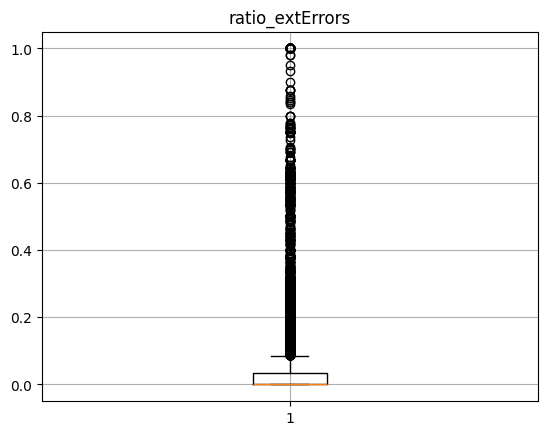

Q1 0.0
Q3 0.034482759
IQR 0.034482759
UB 0.0862068975
LB -0.0517241385
******************************************************************************************************************************************************


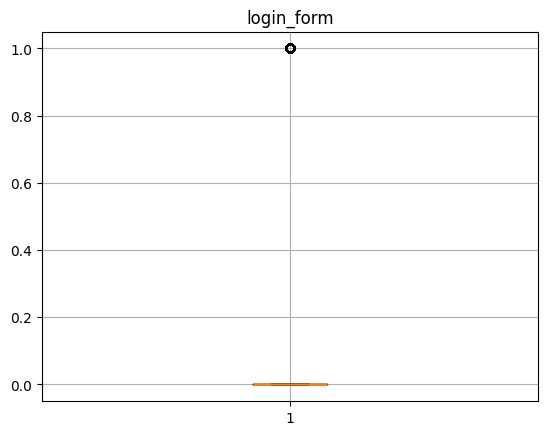

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


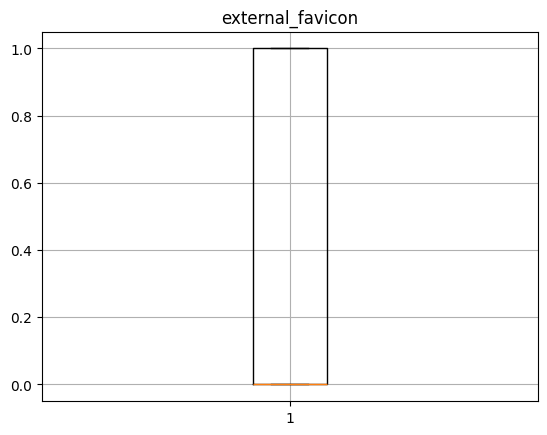

Q1 0.0
Q3 1.0
IQR 1.0
UB 2.5
LB -1.5
******************************************************************************************************************************************************


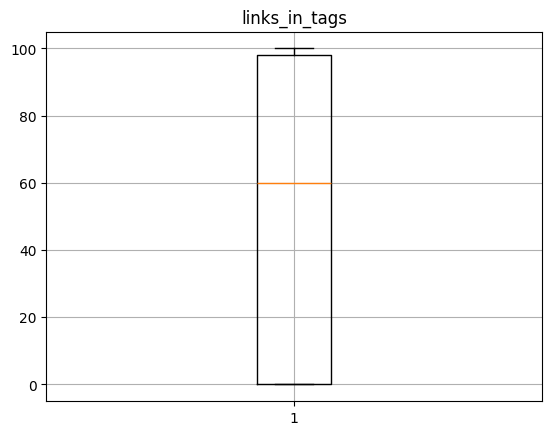

Q1 0.0
Q3 98.0610035675
IQR 98.0610035675
UB 245.15250891875
LB -147.09150535125
******************************************************************************************************************************************************


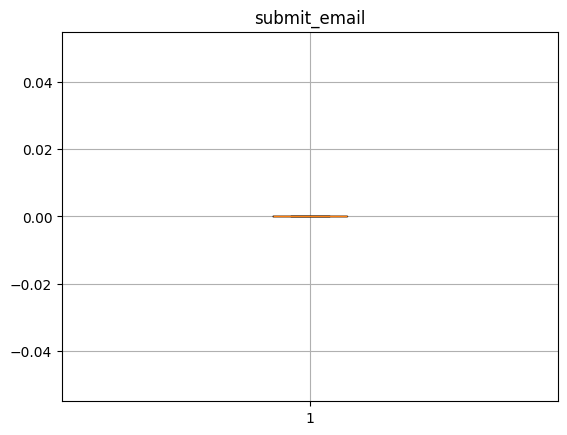

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


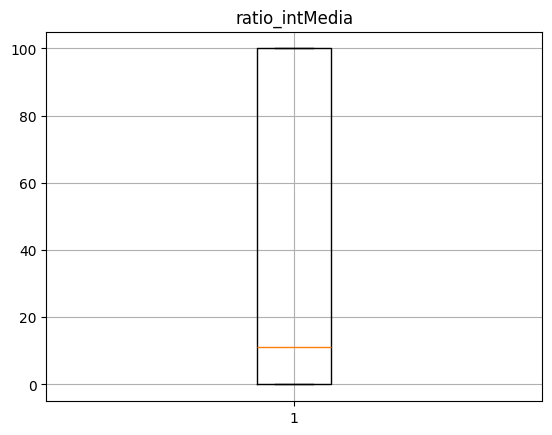

Q1 0.0
Q3 100.0
IQR 100.0
UB 250.0
LB -150.0
******************************************************************************************************************************************************


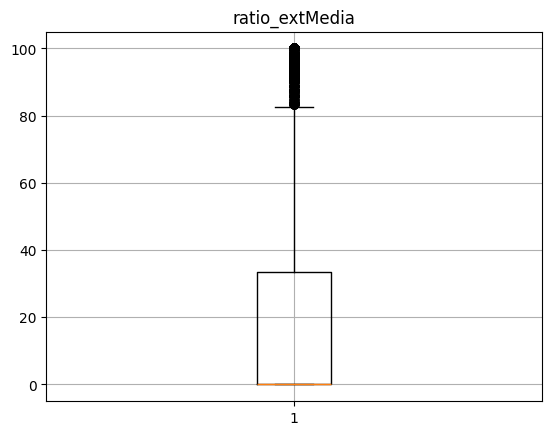

Q1 0.0
Q3 33.33333333
IQR 33.33333333
UB 83.33333332500001
LB -49.999999995
******************************************************************************************************************************************************


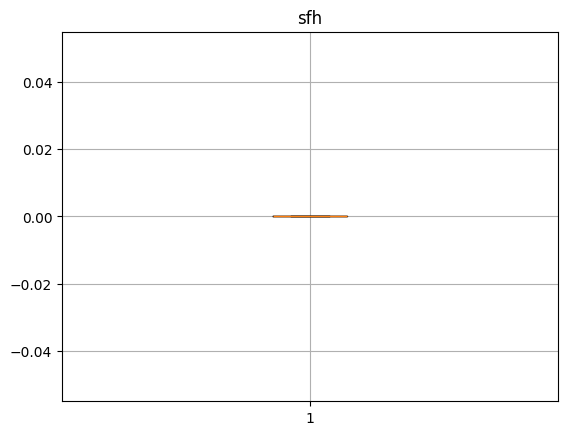

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


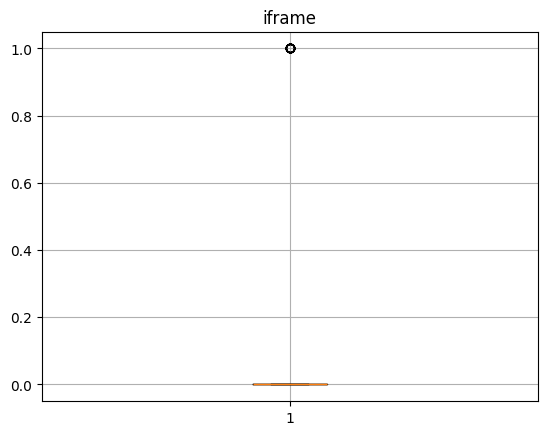

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


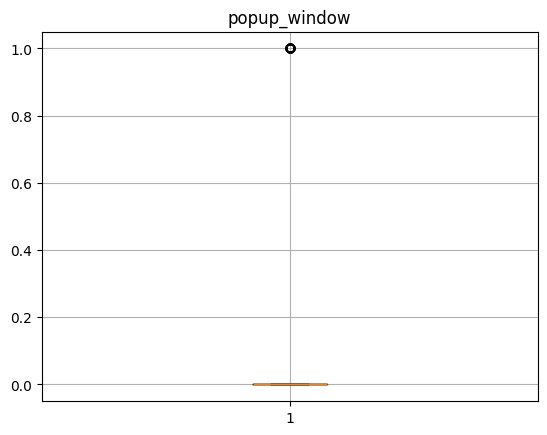

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


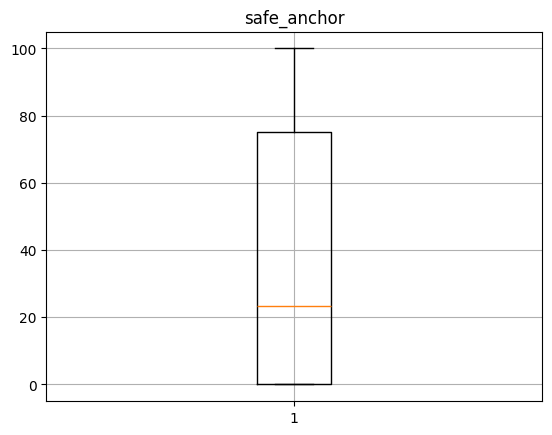

Q1 0.0
Q3 75.0
IQR 75.0
UB 187.5
LB -112.5
******************************************************************************************************************************************************


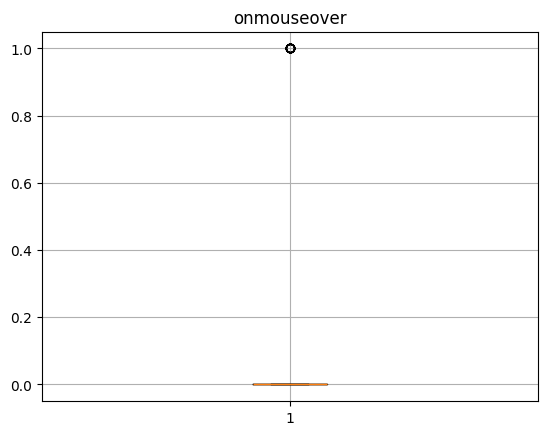

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


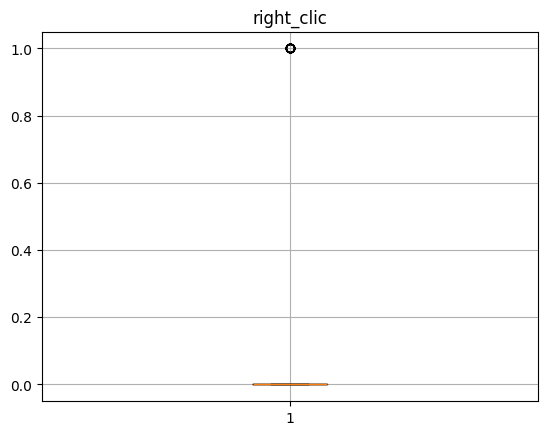

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


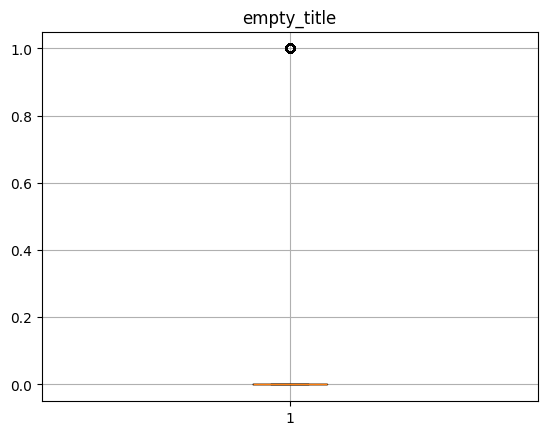

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


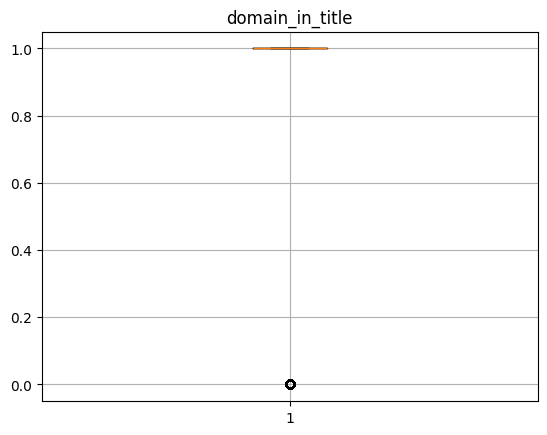

Q1 1.0
Q3 1.0
IQR 0.0
UB 1.0
LB 1.0
******************************************************************************************************************************************************


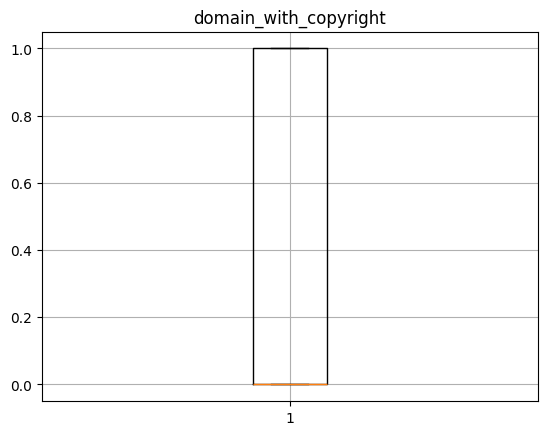

Q1 0.0
Q3 1.0
IQR 1.0
UB 2.5
LB -1.5
******************************************************************************************************************************************************


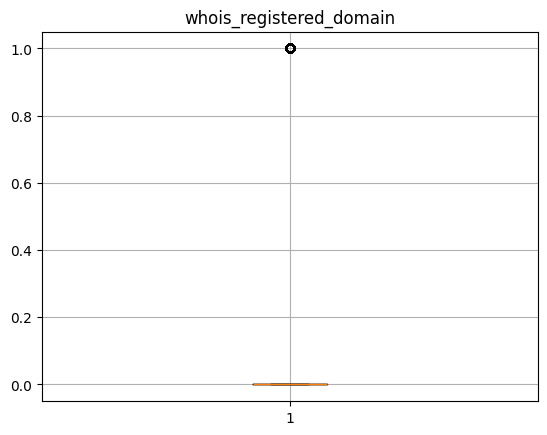

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


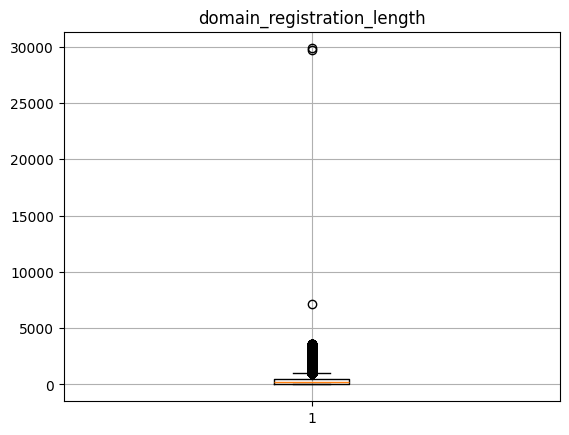

Q1 84.0
Q3 449.0
IQR 365.0
UB 996.5
LB -463.5
******************************************************************************************************************************************************


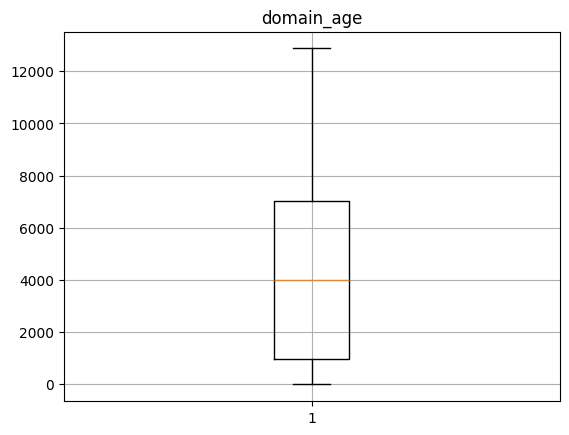

Q1 972.25
Q3 7026.75
IQR 6054.5
UB 16108.5
LB -8109.5
******************************************************************************************************************************************************


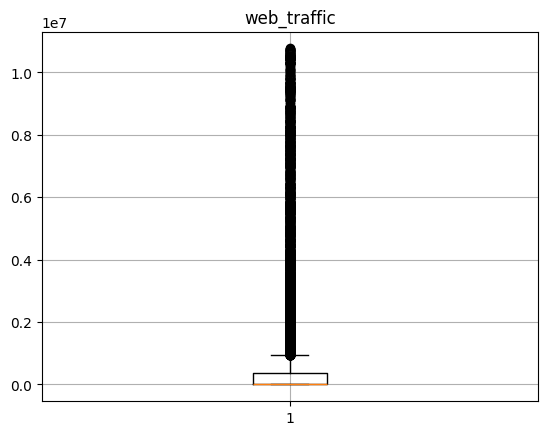

Q1 0.0
Q3 373845.5
IQR 373845.5
UB 934613.75
LB -560768.25
******************************************************************************************************************************************************


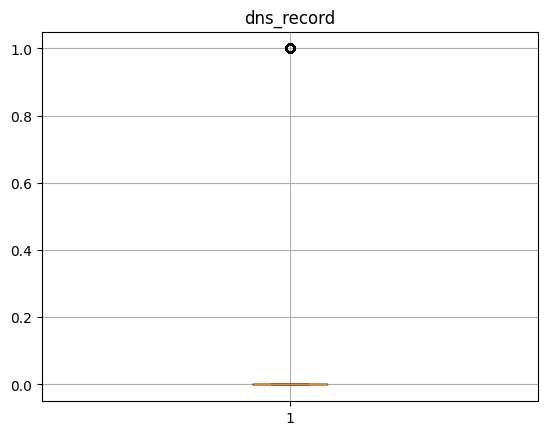

Q1 0.0
Q3 0.0
IQR 0.0
UB 0.0
LB 0.0
******************************************************************************************************************************************************


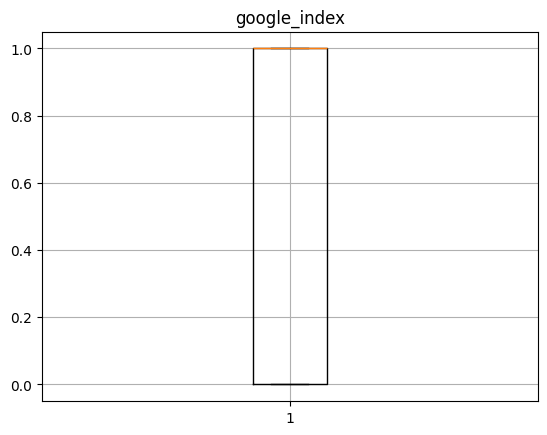

Q1 0.0
Q3 1.0
IQR 1.0
UB 2.5
LB -1.5
******************************************************************************************************************************************************


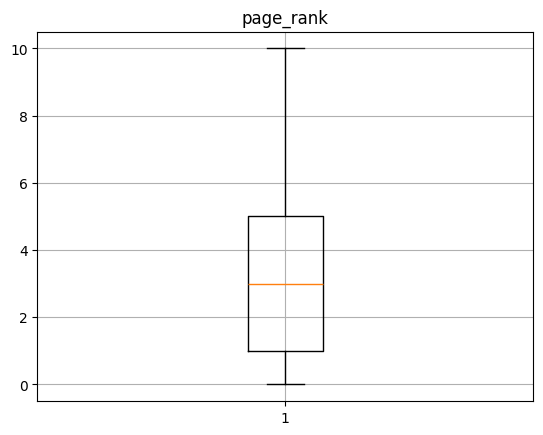

Q1 1.0
Q3 5.0
IQR 4.0
UB 11.0
LB -5.0
******************************************************************************************************************************************************


In [17]:
#handling outliers by plotting boxplots
for i in num:
  plt.boxplot(df[i])
  plt.title(i)
  plt.grid(True)
  plt.show()
  q1=df[i].quantile(0.25)
  print("Q1",q1)
  q3=df[i].quantile(0.75)
  print("Q3",q3)
  iqr=q3-q1
  print("IQR",iqr)
  ub=q3+(1.5*iqr)
  print("UB",ub)
  lb=q1-(1.5*iqr)
  print("LB",lb)
  print("*"*150)

In [18]:
# 1] if we consider first col length_url
#in that min length is 12 and max length is 1641 which is ok/normal by research.
#here the explanation of how?
#->While there is no strict "maximum" URL length from a technical perspective, 32,000 characters is generally supported by most modern browsers,
#but URLs of this length are extremely rare and often suspicious. In practice, URLs longer than 2,000 characters are unusual and could be flagged as potentially phishing,
# especially if they contain complex query parameters or strange domain structures.
#Legitimate websites typically have shorter, simpler URLs that are easy to remember and type.
#Phishing websites, on the other hand, may have longer and more complex URLs that include additional parameters, random strings, or misleading elements to deceive users.
#Short URLs (e.g., under 50 characters) are often used by legitimate websites because they are easier to read and remember.
#Long URLs (e.g., over 100 characters) may indicate a phishing attempt, as they often include extra query parameters or obfuscated domain names meant to hide the true nature of the site.
#A very long URL might also be suspicious if it contains excessive numbers of subdirectories, parameters, or irrelevant information (e.g., multiple & or ? symbols).


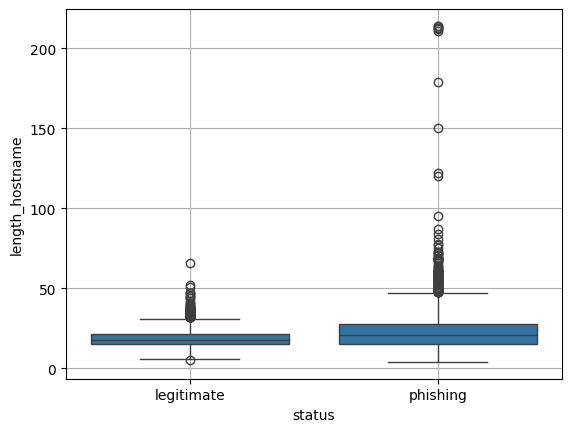

In [19]:
#2] length_hostname: Suspiciously long hostnames (more than 20-30 characters) might be a red flag for phishing.
#so will remove the outliers greater than 30 char
sns.boxplot(data=df,x=df["status"],y=df["length_hostname"])
plt.grid(True)
plt.show()

In [20]:
df.loc[df["length_hostname"]>37.5,"length_hostname"]=37.5

<ipython-input-20-9c7302932c3e>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["length_hostname"]>37.5,"length_hostname"]=37.5


In [21]:
df["nb_dots"].value_counts()

,count
nb_dots,
2,6178
3,2431
1,1302
4,952
5,365
6,80
7,49
8,21
14,10


In [22]:
#3] nb_dots:
#As per the research:
#Dots are used in URLs to separate various parts, such as domain names, subdomains, and extensions (like .com, .org, etc.).
#Short and Simple Domains: Most legitimate websites have fewer dots in their domain names.
#Websites like www.example.com typically have 2 dots.
#Excessive or Suspicious Dots: Phishing websites may use more dots in their URLs to create confusion, hide the real domain, or mimic a legitimate site. For example:
#login.paypal.com.example.com (4 dots)
#www.google-secure-login.com (3 dots)
#phishing sites often use extra dots to mislead users and create a domain structure that appears legitimate at first glance but actually hides the true destination.
# let's drop outliers >4.5

In [23]:
df.loc[df["nb_dots"]>4.5,"nb_dots"]=4.5

<ipython-input-23-8d701a0b62e5>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["nb_dots"]>4.5,"nb_dots"]=4.5


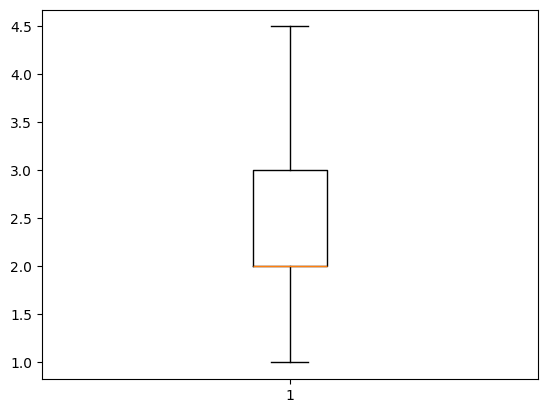

In [24]:
plt.boxplot(df["nb_dots"])
plt.show()

In [25]:
#4] nb_hyphens:
#1-2 hyphens: Often legitimate, especially if they make the domain name easier to read.
#3 or more hyphens: Could be suspicious and is often a characteristic of phishing websites attempting to mimic a legitimate brand or website by adding extra hyphens for disguise.


In [26]:
df["nb_hyphens"].value_counts()

,count
nb_hyphens,
0,6945
1,2262
2,852
3,428
4,293
5,181
6,135
7,100
8,66


<Axes: xlabel='status', ylabel='nb_hyphens'>

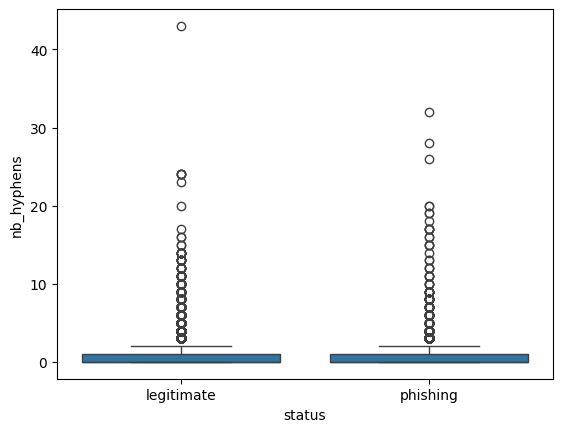

In [27]:
sns.boxplot(data=df,x=df["status"],y=df["nb_hyphens"])

In [28]:
#2 to 4 hyphens: May appear in legitimate but less common websites (e.g., brand or product names).
#5 to 10 hyphens: Highly suspicious; likely phishing.
#More than 10 hyphens: Practically never seen in legitimate websites, strongly indicating a phishing attempt.

In [29]:
df.loc[df["nb_hyphens"]>10,"nb_hyphens"]=10

<Axes: xlabel='status', ylabel='nb_hyphens'>

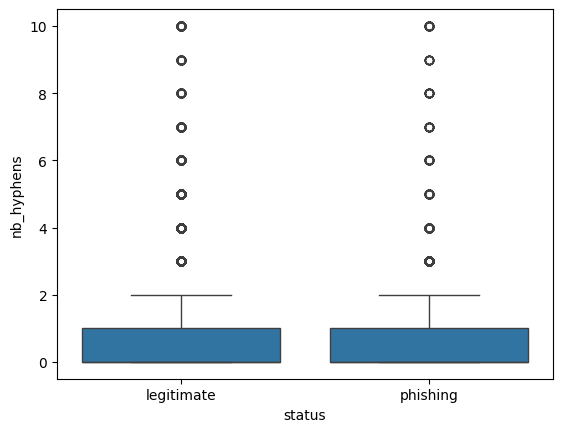

In [30]:
sns.boxplot(data=df,x=df["status"],y=df["nb_hyphens"])

In [31]:
df["nb_at"].value_counts()

,count
nb_at,
0,11185
1,240
2,2
3,2
4,1


In [32]:
df.loc[df["nb_eq"]>15,"nb_eq"]=15

In [33]:
df["nb_underscore"].value_counts()

,count
nb_underscore,
0,9735
1,705
2,636
3,153
4,81
5,48
6,17
7,15
8,13


In [34]:
# nb_underscore:
#The maximum number of underscores used in phishing URLs is generally 5 or more,
# but URLs with 3-4 underscores are also considered suspicious.
# The excessive use of underscores in URLs should raise concerns,
# as legitimate websites rarely use this many underscores. In phishing detection,
# any URL with 5 or more underscores would likely be flagged as outlier or suspicious.

In [35]:
df.loc[df["nb_underscore"]>5,"nb_underscore"]=5

In [36]:
#nb_percent:
#If a phishing website uses more than 10-20 percent signs, it's likely an attempt at obfuscation, and this should be flagged as suspicious.
#URLs with 50% or more percent signs (such as 96%) are extremely unusual and should definitely be treated as outliers.

In [37]:
df["nb_percent"].value_counts()

,count
nb_percent,
0,11075
1,159
2,54
4,42
3,27
5,18
6,13
7,8
12,5


In [38]:
df.loc[df["nb_percent"]>50,"nb_percent"]=50

In [39]:
#nb_slash:
#Phishing websites tend to use tactics like domain name obfuscation, redirects, or hiding malicious URLs with encoded characters,
#but it’s very rare for a legitimate or even a typical phishing URL to have this many slashes.
#If you encounter URLs with 20-33 slashes, it would be an outlier in your dataset and should be flagged for further inspection.


In [40]:
df.loc[df["nb_slash"]>20,"nb_slash"]=20

In [41]:
df1=df.drop("url",axis=1)
df1

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19.0,0,3.0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23.0,1,1.0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,37.5,1,4.0,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11.0,0,2.0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15.0,0,2.0,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17.0,0,2.0,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,84,18.0,0,4.5,0,1,1,0,0,1,...,1,0,0,211,6728,0,0,1,0,phishing
11427,105,16.0,1,2.0,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,38,30.0,0,2.0,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [42]:
df1["status"].replace({"legitimate":0,"phishing":1},inplace=True)


<ipython-input-42-baf7d434af11>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["status"].replace({"legitimate":0,"phishing":1},inplace=True)
<ipython-input-42-baf7d434af11>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["status"].replace({"legitimate":0,"phishing":1},inplace=True)


In [43]:
df1

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19.0,0,3.0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23.0,1,1.0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,37.5,1,4.0,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11.0,0,2.0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15.0,0,2.0,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17.0,0,2.0,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,0
11426,84,18.0,0,4.5,0,1,1,0,0,1,...,1,0,0,211,6728,0,0,1,0,1
11427,105,16.0,1,2.0,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,0
11428,38,30.0,0,2.0,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,0


In [44]:
df1.corr().tail(1)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
status,0.24858,0.239677,0.321698,0.217674,-0.112005,0.142915,0.294319,0.170546,NaN,0.23777,...,0.342807,-0.173098,0.066979,-0.161719,-0.331889,0.060388,0.122119,0.731171,-0.511137,1.0


<Axes: >

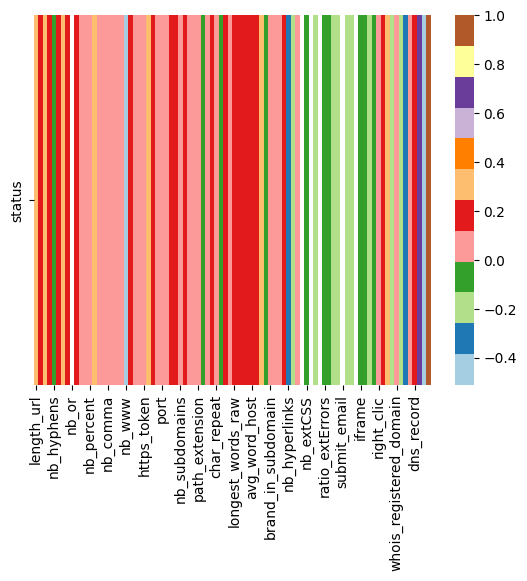

In [45]:
#Heatmaps: Correlation matrix heatmap to identify relationships between features and their potential relevance to the target variable.
sns.heatmap(df1.corr().tail(1), cmap="Paired")

In [46]:
#so from above heatmap we can clearly see that the columns that moderatly and highly correlated are as follows:
#dns_record
#submit_email
#ip
#domain_in_title
#domain_age
#google_index
#page_rank
#nb_qm
#nb_or
#nb_www

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc=StandardScaler()

In [49]:
num=df.describe().columns
num

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [50]:
for i in num:
  df1[i]=sc.fit_transform(df1[[i]])


In [51]:
df1.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,11430.0,1.143000e+04,...,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,1.143000e+04,11430.000000
mean,-5.221836e-17,1.305459e-17,5.284001e-18,-1.321000e-17,-6.309719e-17,1.181130e-17,-1.554118e-17,1.989271e-17,0.0,-5.843484e-17,...,7.335437e-17,-5.843484e-17,6.216472e-19,2.237930e-17,-1.243294e-18,-1.429789e-17,1.150047e-17,-9.138214e-17,-8.703061e-18,0.500000
std,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,0.0,1.000044e+00,...,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,0.500022
min,-8.884488e-01,-2.165468e+00,-4.210204e-01,-1.536003e+00,-5.277640e-01,-1.429146e-01,-3.874641e-01,-1.976037e-01,0.0,-2.988704e-01,...,-1.860473e+00,-8.855872e-01,-2.803697e-01,-6.057589e-01,-1.311134e+00,-4.293403e-01,-1.433029e-01,-1.070361e+00,-1.255788e+00,0.000000
25%,-5.086669e-01,-7.043641e-01,-4.210204e-01,-4.304639e-01,-5.277640e-01,-1.429146e-01,-3.874641e-01,-1.976037e-01,0.0,-2.988704e-01,...,5.374978e-01,-8.855872e-01,-2.803697e-01,-5.014303e-01,-9.944154e-01,-4.293403e-01,-1.433029e-01,-1.070361e+00,-8.615977e-01,0.000000
50%,-2.554790e-01,-1.730536e-01,-4.210204e-01,-4.304639e-01,-5.277640e-01,-1.429146e-01,-3.874641e-01,-1.976037e-01,0.0,-2.988704e-01,...,5.374978e-01,-8.855872e-01,-2.803697e-01,-3.075019e-01,-2.237825e-02,-4.285130e-01,-1.433029e-01,9.342641e-01,-7.321666e-02,0.500000
75%,1.785574e-01,4.910845e-01,-4.210204e-01,6.750753e-01,2.097998e-02,-1.429146e-01,-3.874641e-01,-1.976037e-01,0.0,-2.988704e-01,...,5.374978e-01,1.129194e+00,-2.803697e-01,-5.343119e-02,9.538421e-01,-2.419978e-01,-1.433029e-01,9.342641e-01,7.151644e-01,1.000000
max,2.857177e+01,2.284257e+00,2.375182e+00,2.333384e+00,4.959676e+00,2.558171e+01,7.844347e+00,2.293641e+01,0.0,1.506124e+01,...,5.374978e-01,1.129194e+00,3.566720e+00,3.600743e+01,2.835409e+00,4.966743e+00,6.978227e+00,9.342641e-01,2.686117e+00,1.000000


In [52]:
#sns.pairplot(df1 )
#plt.show()

In [53]:
#Pair Plots: Visualization of relationships between pairs of numerical features to identify correlations or trends.
#Certainly! To create a pair plot for your phishing dataset with 89 features, we can use the seaborn library in Python.
#However, plotting all 89 features in a pair plot would be impractical due to the large number of combinations.
#Instead, we can plot a subset of the features.
subset_col = [
    'length_url','ip', 'nb_at', 'https_token', 'ratio_digits_url',
    'nb_redirection', 'phish_hints', 'page_rank',
     'status'
]  #### as there are 88 features that's why I'm using some of the features to show pairplot


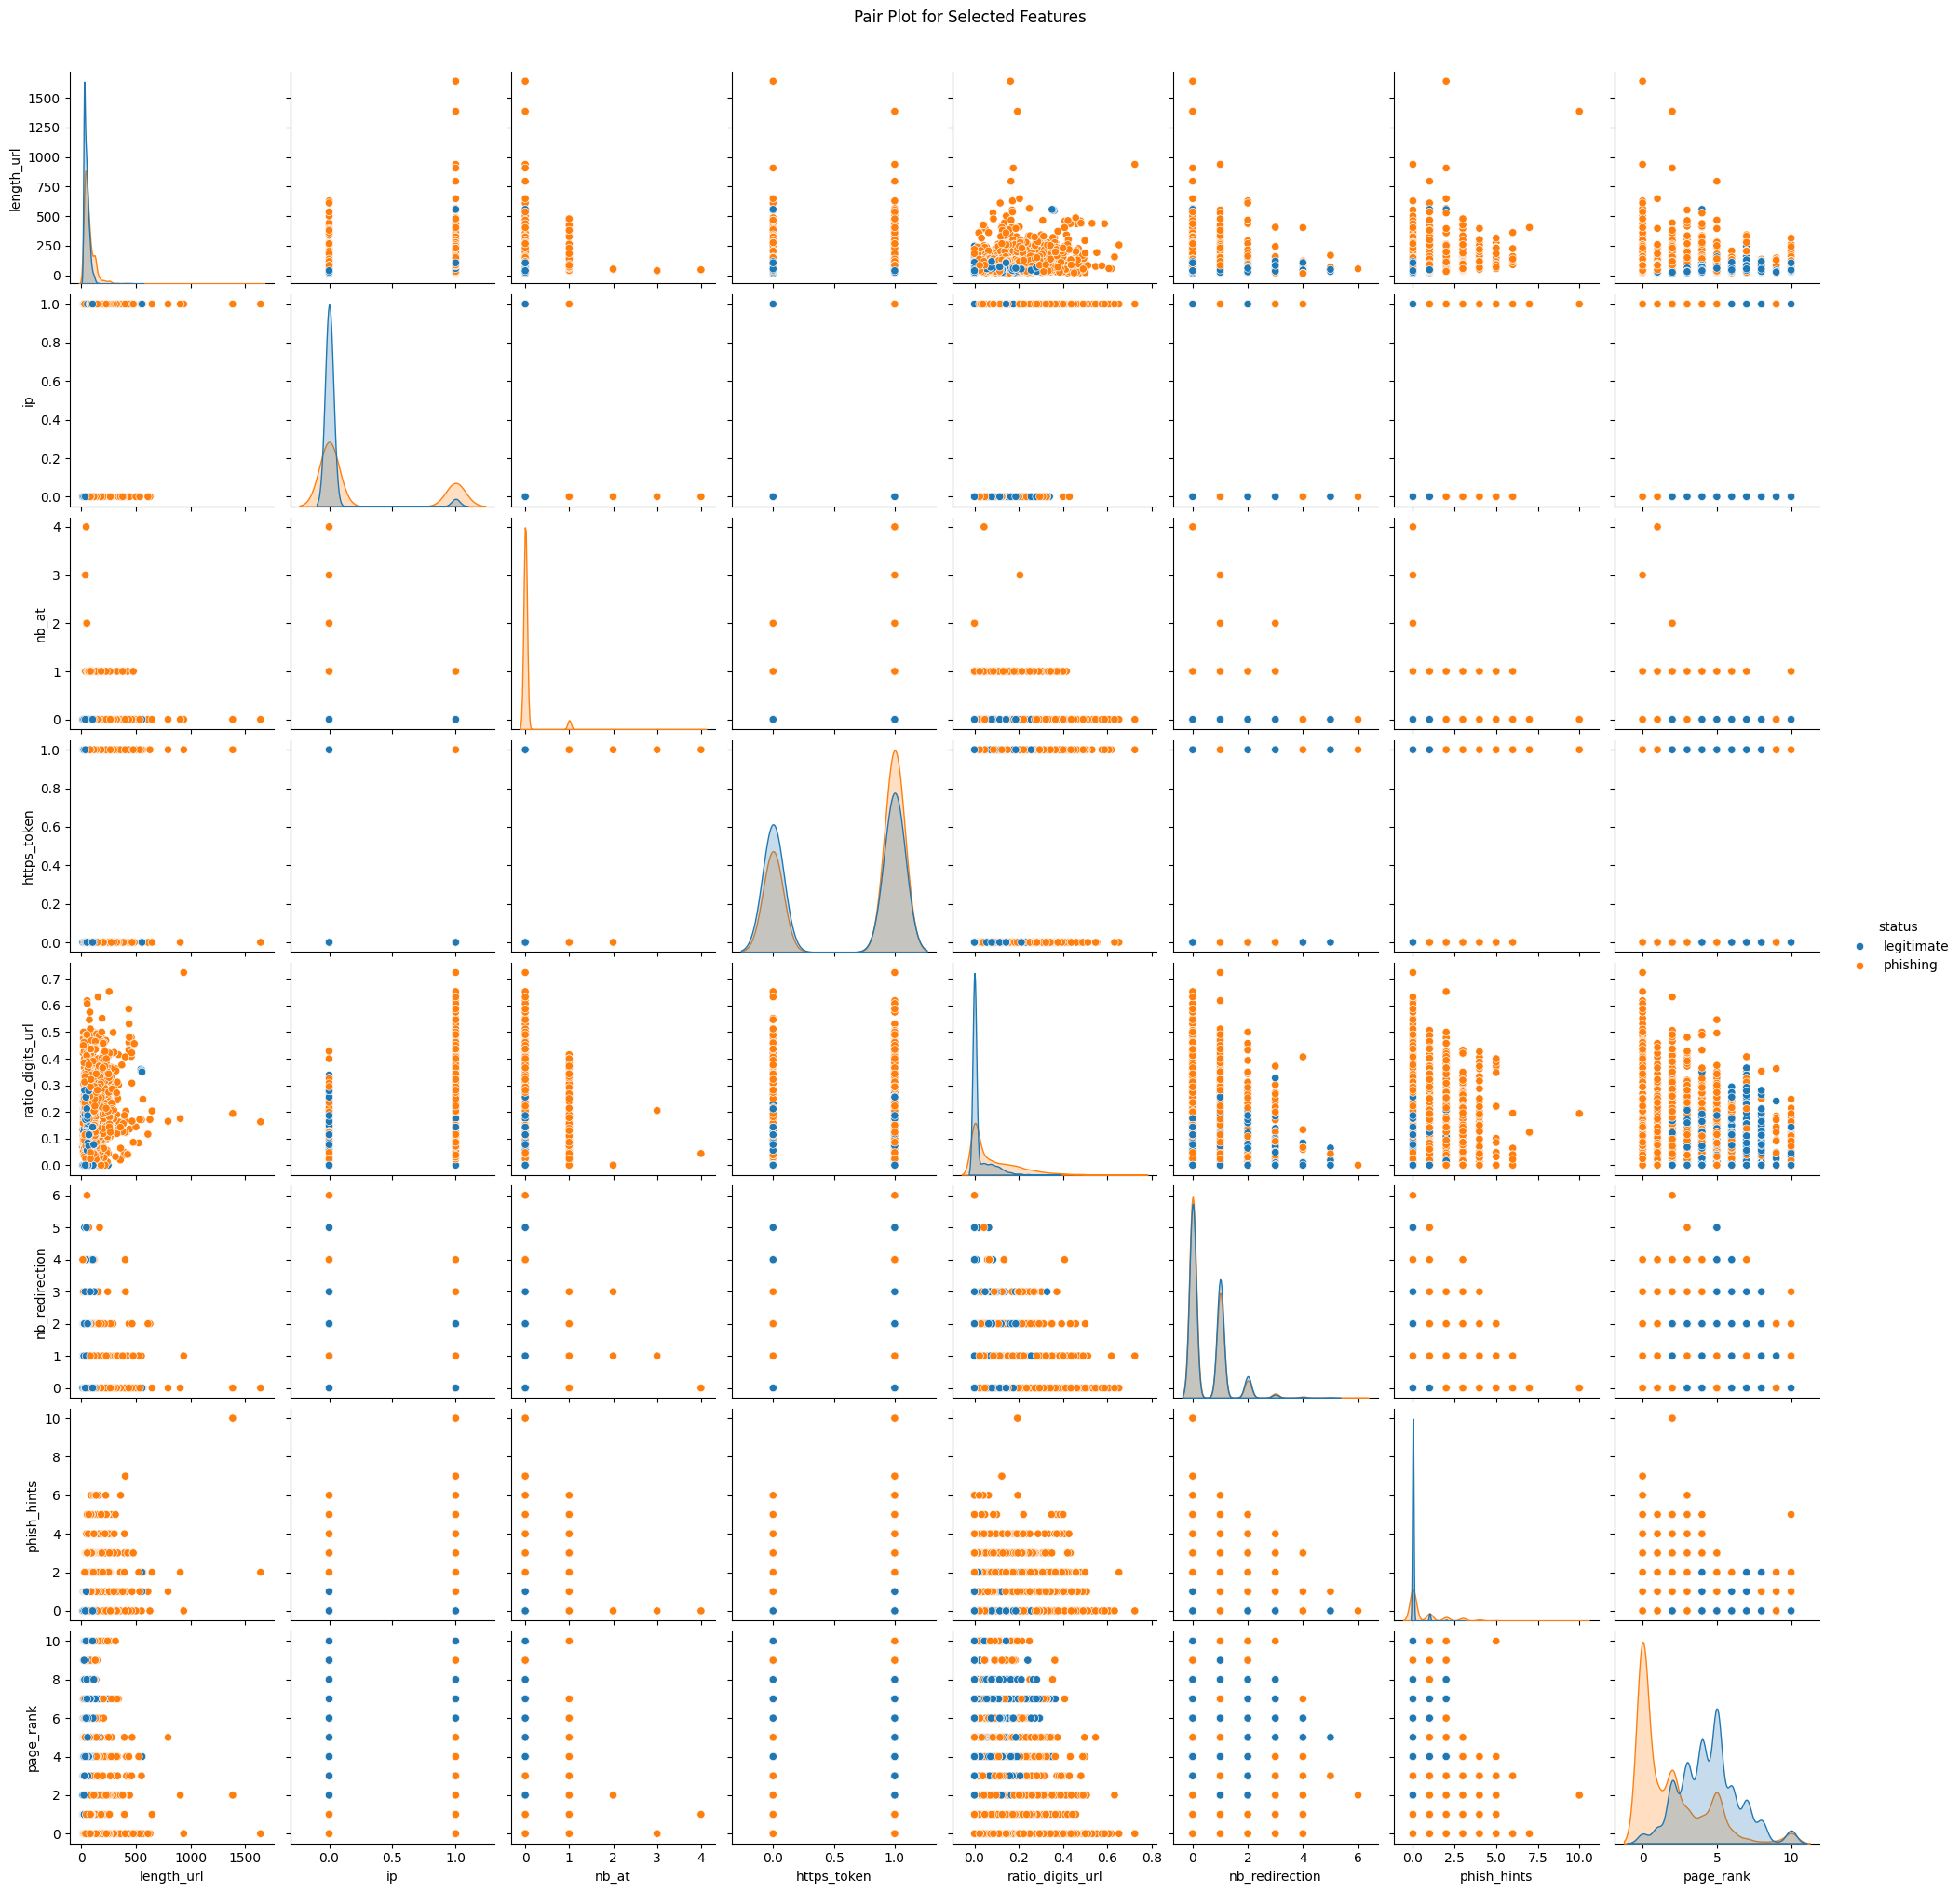

In [54]:
sns.pairplot(df[subset_col], hue='status', diag_kind='kde')  #Diagonal Histograms/KDE Plots:Show the distribution of each variable.A normal or skewed shape may indicate underlying trends.
plt.suptitle("Pair Plot for Selected Features", y=1.02)
plt.show()

In [54]:
## Interpretation of above graphs

# A] length_url
#(1)(Top-left diagonal plot)
# Highly right-skewed distribution (most URLs have a short length).
# A few extremely long URLs may indicate potential phishing attempts.

#(2)length_url vs. ip (First row, second column)
# Clustered at ip = 0 (majority of URLs do not use raw IPs).
# A few points at ip = 1 indicate phishing URLs may use IP-based links.
# Conclusion: IP-based URLs might be a strong phishing indicator.

#B] ip Feature (Second diagonal plot)
#A binary distribution (only values 0 or 1).
#This means URLs either contain an IP address (1) or not (0).

# Other Features (Diagonal Plots)
# Most seem to be categorical or binary with sharp peaks.
# Possible imbalance in classes, requiring resampling techniques.